In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import trimesh
import argparse
import os
import time
import numpy as np
import torch
import torch.optim as optim
import lib.utils as utils
from lib.utils import standard_normal_logprob
from lib.utils import count_nfe, count_total_time
from lib.utils import build_model_tabular
import pandas as pd
import random
from lib.visualize_flow import visualize_transform
import lib.layers.odefunc as odefunc
from matplotlib import pyplot as plt
%matplotlib inline 
import glob

In [3]:
DATA_add = "/home/staff/azad/deeplearning/pointcloud/PAINT_DiffTemp/Core-shell/"
Type     = ['Microgel_plotter_v1_density', 'Microgel_plotter_v2_solvatochromism']

temperature_list = os.listdir(DATA_add)
temperature_list.sort()
temperature_list

['21C', '33C', '35C', '38C', '43C', '53C']

Text(0.5, 0, 'Z')

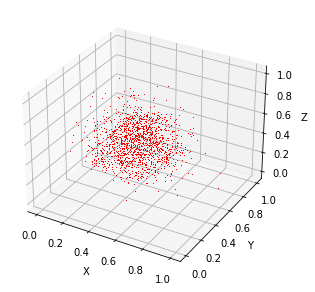

In [23]:
DATA_add = "/home/staff/azad/deeplearning/pointcloud/PAINT_DiffTemp/Core-shell/"
Type     = ['Microgel_plotter_v1_density', 'Microgel_plotter_v2_solvatochromism']

temperature_list = os.listdir(DATA_add)
temperature_list.sort()

def get_data(idt = None, T = 0):
    if not idt:
        idt = random.randint(0,len(temperature_list)-1)
    DATA_list = glob.glob(DATA_add+ temperature_list[idt]+'/'+Type[T]+"/*.3d")
    temperature = int(temperature_list[0][-3:-1])
    indx = 1# random.randint(0,len(DATA_list)-1)
    DATA = pd.read_csv(DATA_list[indx], delimiter = "\t", header=None)
    DATA = DATA.to_numpy()[:,:4]
    DATA -= np.mean(DATA, axis=0) 
    DATA = (DATA-np.min(DATA, axis=0))/(np.max(DATA, axis=0)-np.min(DATA, axis=0)) 
    return DATA

DATA = get_data(idt = 1, T =0)
fig = plt.figure(figsize=(25,5))
ax1 = fig.add_subplot(1, 3, 3, projection="3d")
ax1.scatter(DATA[:, 0], DATA[:, 1], DATA[:, 2], s=1, c='r', marker="s", facecolor="red", lw=0, alpha=1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [70]:
all_localiz  = DATA
xcoord=all_localiz[:,0]
deltax = xcoord-np.median(xcoord)

ycoord = all_localiz[:,1];
deltay = ycoord-np.median(ycoord);
intens = all_localiz[:,3]/100;
zvec   = all_localiz[:,2]
                 
d_axis = np.sqrt(np.power(deltax,2)+np.power(deltay,2));
h = (zvec-np.median(zvec))+400;
    
d_dist=10
h_dist=10

labelx_dist=100
labely_dist=100

temp = range(0,400,d_dist)[:]
d_range = [temp[i] for i in range(len(temp))]
temp = range(0,400,h_dist)[:]
h_range = [temp[i] for i in range(len(temp))]
pi = 3.1416            
            
            

In [71]:
V = np.zeros(len(d_range))
for i in range(len(d_range)):
    V[i]=((d_range[i]+d_dist)^2-(d_range[i])^2)*pi*h_dist

In [82]:
# d_axis = np.expand_dims(d_axis, axis = 1)
# h      = np.expand_dims(h, axis = 1)

data = np.zeros((len(d_axis), 5))
# data = np.concatenate([d_axis, h], axis=1)
data[:, 0] =  d_axis
data[:, 1] =  h


for i in range(len(d_range)-1):
    for j in range(len(data)):
        if data[j,0]>d_range[i] and (data[j,0]<=d_range[i+1]):
            data[j,2] = i
        
for i in range(len(h_range)-1):
    for j in range(len(data)):
        if data[j,1]>h_range[i] and (data[j,1]<=h_range[i+1]):
            data[j,3] = i
            
data[:,4]= intens
count=np.zeros((len(d_range)-1, len(h_range)-1))

# print(data)
# data2 = []

# for i in range(len(data)):
#     if data[i, 2]>0 and data[i, 3]>0:
#         data2.append(data[i])
        
# data = np.array(data2)        





            
            
    

In [48]:

for i=1:length(d_range)-1
    data((data(:,1)>d_range(i))&(data(:,1)<=d_range(i+1)),3)=i;
end
for i=1:length(h_range)-1
    data((data(:,2)>h_range(i))&(data(:,2)<=h_range(i+1)),4)=i;  
end



data(:,5)= intens; % for including the solvatochromism
count=zeros(length(d_range)-1,length(h_range)-1);
data=data(data(:,3)>0,:); % if a data point is out of the x range, throw it away
data=data(data(:,4)>0,:);% if a data point is out of the y range, throw it away

for i=1:size(data,1)
    try
        count(data(i,3),data(i,4))=count(data(i,3),data(i,4))+1; 
        %count{(data(i,3),data(i,4))}=data(i,3),data(i,4),data(i,5); 
       %count(data(i,5))=count(data(i,5))+1
    catch
        i;
    end
end


NameError: name 'd_dist' is not defined

Text(0.5, 0, 'Z')

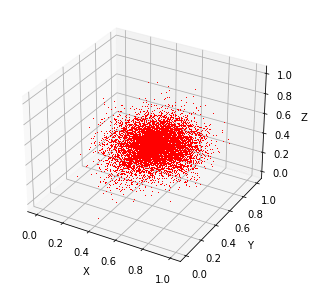

In [9]:

add = "./../M33/NR_1.3d";

all_localiz  = DATA;


xcoord=all_localiz[:,0];
deltax = xcoord-median(xcoord);
ycoord=all_localiz(:,2);
deltay = ycoord-median(ycoord);
intens=all_localiz(:,4)/100;

zvec=all_localiz(:,3);

    %% calculations and preparation of histogram ranges
    d_axis = sqrt(deltax.^2+deltay.^2);
    h = (zvec-median(zvec))+400;

     clear count V d_range h_range;
    


    d_dist=10;
    h_dist=10;
    
    labelx_dist=100;
    labely_dist=100;

    d_range=0:d_dist:400;
    h_range=0:h_dist:800;
    

   % hist_h=hist(h,h_range);
   % hist_d=hist(d_axis,d_range);

    %% calculation of the 2D histogram
    for i=1:length(d_range)-1
        V(i)=((d_range(i)+d_dist)^2-(d_range(i))^2)*pi*h_dist;
    end

    data=[d_axis h];
    for i=1:length(d_range)-1
        data((data(:,1)>d_range(i))&(data(:,1)<=d_range(i+1)),3)=i;
    end
    for i=1:length(h_range)-1
        data((data(:,2)>h_range(i))&(data(:,2)<=h_range(i+1)),4)=i;  
    end
    
    
         
    data(:,5)= intens; % for including the solvatochromism
    count=zeros(length(d_range)-1,length(h_range)-1);
    data=data(data(:,3)>0,:); % if a data point is out of the x range, throw it away
    data=data(data(:,4)>0,:);% if a data point is out of the y range, throw it away
    
    for i=1:size(data,1)
        try
            count(data(i,3),data(i,4))=count(data(i,3),data(i,4))+1; 
            %count{(data(i,3),data(i,4))}=data(i,3),data(i,4),data(i,5); 
           %count(data(i,5))=count(data(i,5))+1
        catch
            i;
        end
    end
    
    



%% Plotting the localization density wrt median of I_ratio
   medint=zeros(length(d_range)-1,length(h_range)-1); %defining the size of "medint" to determine the medians of intensity ratios in specific pixels 
  
   for d=1:size(d_range',1)-1
   for h=1:size(h_range',1)-1
       ProcessData=data; % just copying the data to ProcessData variable
       
       % deleting all the values which are out of specific range
       for k=1:size(data,1)
            if (ProcessData(k,1)<=d_range(d)||ProcessData(k,1)>d_range(d+1)) || (ProcessData(k,2)<=h_range(h)||ProcessData(k,2)>h_range(h+1))
                ProcessData(k,5)=0;
            end
       end
       % copying all I_ratios to a new vector
       for i=size(ProcessData,5)
           OnlyInt = ProcessData(:,5);
       end
       OnlyInt(OnlyInt==0)=[];%% deleting the I_ratios = 0
       medint(d,h)=median(OnlyInt);% Replace the zeros with either NAN or median of I_ratio
   end
   end
%medint(isnan(medint))=0;% Replacing NAN values with zeros
medint=medint';
    %% visualization
    figure_height_in_pixel=600;
    
    figure;
    set(gcf,'Position',[20 20 figure_height_in_pixel max(h_range)/max(d_range)*figure_height_in_pixel]);
    count=count'./repmat(V,size(count,2),1);
%     countbin = count;

    %imagesc(count); % To plot wrt density values
    imagesc(medint); % To plot wrt I_ratios
    
    axis equal % suggestion by Eric to prevent elonagation in z
    
   
   
    set(gca,'Ydir','Normal');
    set(gca,'FontSize',22);
    xlim([0.5 max(d_range/d_dist)+1]);
    ylim([0.5 max(h_range/h_dist)+1]);
    title('\fontsize{70}\fontname{Calibri} f','position',[-7.424 82.9050 0])
    %title('\fontsize{70}\fontname{Calibri} 21 C', 'position',[20.424 82.9050 0]); 
    xlabel('Dist. from symmetry axis / nm','FontSize',22);
    ylabel('Relative z / nm','FontSize',22);
    set(gca,'XTick',d_range/d_dist*labelx_dist/d_dist+0.5);
    set(gca,'XTickLabel',0:labelx_dist:max(d_range));
    set(gca,'YTick',h_range/h_dist*labely_dist/h_dist+0.5);
    set(gca,'YTickLabel',-400:labely_dist:400);
%     set(gcf,'color','w');%Ashvini test
%         set(gca,'YTick',-300:10:300);
%         set(gca,'YTickLabel',0:labely_dist:max(h_range));
hcb = colorbar;

constant_colorbar = 0;
if constant_colorbar == 1 % keeping the colorbar constant
    cmax = maximum_limcolor;
else 
    %cmax = max(max(count));
    cmax = max(max(medint));
end
cmin=0.4;
% cmin = -(cmax/(interval+200))+0.4; % correction for colorbar to start the blue color at almost 0 
caxis([cmin cmax]);
%caxis([0.4 0.8]);

if LowerIntensity == 0 && UpperIntensity == 2000
    % colormap gray;
%       [map] = ColormapAll(colormap); %For jet
%       colormap(map);
%       
      [map] = Colormapblue2red(colormap);% Use this for Radial solvato values
   colormap(map); 

elseif LowerIntensity == 0 && UpperIntensity == 200
%     [map] = ColormapAll(colormap);
%      colormap(map);
        colormap gray;
        
        
% elseif LowerIntensity == 0 && UpperIntensity == 50
%    [map] = ColormapAll(mapblue);
%    colormap(map);
% elseif LowerIntensity == 50 && UpperIntensity == 100
%    [map] = ColormapAll(mapgreen);
%    colormap(map);
% elseif LowerIntensity == 100 && UpperIntensity == 150
%    [map] = ColormapAll(mapgreenyellow);
%    colormap(map);
% elseif LowerIntensity == 150 && UpperIntensity == 200
%    [map] = ColormapAll(mapred);
%    colormap(map);
else
   % colormap hot;
    [map] = Colormapblue2red(colormap);% Use this for Radial solvato values
   colormap(map); 
%    [map] = ColormapAll(colormap);
%    colormap(map);
end


In [4]:
def get_transforms(model):

    def sample_fn(z, logpz=None):
        zeors_std = torch.zeros(z.shape[0], 1).to(z)
        if logpz is not None:
            return model(z, zeors_std, logpz, reverse=True)
        else:
            return model(z, zeors_std, reverse=True)

    def density_fn(x, logpx=None):
        zeors_std = torch.zeros(x.shape[0], 1).to(x)
        if logpx is not None:
            return model(x, zeors_std, logpx, reverse=False)
        else:
            return model(x, zeors_std, reverse=False)

    return sample_fn, density_fn

DATA_add = "/home/staff/azad/deeplearning/pointcloud/PAINT_DiffTemp/Core-shell/"
Type     = ['Microgel_plotter_v1_density', 'Microgel_plotter_v2_solvatochromism']

temperature_list = os.listdir(DATA_add)
temperature_list.sort()
temperature_list.remove('35C')

def get_data():
    idt = random.randint(0,len(temperature_list)-1)
    DATA_list = glob.glob(DATA_add+ temperature_list[idt]+'/'+Type[0]+"/*.3d")
    temperature = int(temperature_list[0][-3:-1])
    indx = random.randint(0,len(DATA_list)-1)
    DATA = pd.read_csv(DATA_list[indx], delimiter = "\t", header=None)
    DATA = DATA.to_numpy()[:,:3]
    DATA -= np.mean(DATA, axis=0) 
    DATA = (DATA-np.min(DATA, axis=0))/(np.max(DATA, axis=0)-np.min(DATA, axis=0)) 
    newrow = [temperature, temperature, temperature]
    DATA = np.vstack([newrow, DATA])

    return DATA



def compute_loss(args, model, batch_size=None):
    if batch_size is None: batch_size = args.batch_size
    x = get_data()


    x = torch.from_numpy(x).type(torch.float32).to(device)
    zero = torch.zeros(x.shape[0], 1).to(x)

    # transform to z
    std = (args.std_max - args.std_min) * torch.rand_like(x[:,0]).view(-1,1) + args.std_min
    eps = torch.randn_like(x) * std
    std_in = std / args.std_max * args.std_weight
#     print(x.shape, std_in.shape, zero.shape)
    z, delta_logp = model(x+eps, std_in, zero)

    # compute log q(z)
    logpz = standard_normal_logprob(z).sum(1, keepdim=True)

    logpx = logpz - delta_logp
    loss = -torch.mean(logpx)
    return loss

In [5]:
model = build_model_tabular(args, 3).to(device)

optimizer = optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)

time_meter = utils.RunningAverageMeter(0.93)
loss_meter = utils.RunningAverageMeter(0.93)
nfef_meter = utils.RunningAverageMeter(0.93)
nfeb_meter = utils.RunningAverageMeter(0.93)
tt_meter = utils.RunningAverageMeter(0.93)

end = time.time()
best_loss = float('inf')

In [6]:
LOW = -4
HIGH = 4
def visualize3d(samples, prior_sample, prior_logdensity, n_samples, transform, inverse_transform, memory=100, title1="$x ~ p(x)$", title2="$q(x)$", title3="$x ~ q(x)$", device="cpu", npts = 100):
    ## first one
    fig = plt.figure(figsize=(25,5))
    ax1 = fig.add_subplot(1, 3, 1, projection="3d")
    ax1.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=1, c='b', marker="s", facecolor="red", lw=0, alpha=1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title(title1)
    
    ## second one
    side = np.linspace(LOW, HIGH, npts)
    xx, yy, zz = np.meshgrid(side, side, side)
    memory=100
    x = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1), zz.reshape(-1, 1)])
    x = torch.from_numpy(x).type(torch.float32).to(device)
    zeros = torch.zeros(x.shape[0], 1).to(x)

    z, delta_logp = [], []
    inds = torch.arange(0, x.shape[0]).to(torch.int64)
    for ii in torch.split(inds, int(memory**2)):
        z_, delta_logp_ = inverse_transform(x[ii], zeros[ii])
        z.append(z_)
        delta_logp.append(delta_logp_)
    z = torch.cat(z, 0)
    delta_logp = torch.cat(delta_logp, 0)

    logpz = prior_logdensity(z).view(z.shape[0], -1).sum(1, keepdim=True)  # logp(z)
    logpx = logpz - delta_logp

    px = np.exp(logpx.detach().cpu().numpy()).reshape(npts, npts,npts)
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(px[:,:,1])
    ax.set_title(title2)
    
    ## Third one
    z = prior_sample(n_samples, 3).type(torch.float32).to(device)
    zk = []
    inds = torch.arange(0, z.shape[0]).to(torch.int64)
    for ii in torch.split(inds, int(memory**2)):
        zk.append(transform(z[ii]))

    zk = torch.cat(zk, 0).detach().cpu().numpy()

    ax1 = fig.add_subplot(1, 3, 3, projection="3d")
    ax1.scatter(zk[:, 0], zk[:, 1], zk[:, 2], s=1, c='r', marker="s", facecolor="red", lw=0, alpha=1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title(title3)


In [ ]:
model.train()
for itr in range(1, args.niters + 1):
    optimizer.zero_grad()

    loss = compute_loss(args, model)
    

    loss_meter.update(loss.item())

    total_time = count_total_time(model)
    nfe_forward = count_nfe(model)

    loss.backward()
    optimizer.step()

    nfe_total = count_nfe(model)
    nfe_backward = nfe_total - nfe_forward
    nfef_meter.update(nfe_forward)
    nfeb_meter.update(nfe_backward)

    time_meter.update(time.time() - end)
    tt_meter.update(total_time)

    log_message = (
        'Iter {:04d} | Time {:.4f}({:.4f}) | Loss {:.6f}({:.6f}) | NFE Forward {:.0f}({:.1f})'
        ' | NFE Backward {:.0f}({:.1f}) | CNF Time {:.4f}({:.4f})'.format(
            itr, time_meter.val, time_meter.avg, loss_meter.val, loss_meter.avg, nfef_meter.val, nfef_meter.avg,
            nfeb_meter.val, nfeb_meter.avg, tt_meter.val, tt_meter.avg
        )
    )

    print(log_message)
    
    if itr % args.val_freq == 0 or itr == args.niters:
        with torch.no_grad():
            model.eval()
            test_loss = compute_loss(args, model, batch_size=args.test_batch_size)
            test_nfe = count_nfe(model)
            log_message = '[TEST] Iter {:04d} | Test Loss {:.6f} | NFE {:.0f}'.format(itr, test_loss, test_nfe)
            print(log_message)

            if test_loss.item() < best_loss:
                best_loss = test_loss.item()
                utils.makedirs(save_path)
                torch.save({
                    'args': args,
                    'state_dict': model.state_dict(),
                }, os.path.join(save_path, 'checkpt.pth'))
            model.train()

    if itr % args.viz_freq == 0:
        with torch.no_grad():
            model.eval()
#             p_samples = toy_data.inf_train_gen(args.data, batch_size=2000)
            p_samples = get_data()

            sample_fn, density_fn = get_transforms(model)
            p_samples = p_samples[1:]
            plt.figure(figsize=(9, 3))
            visualize3d(p_samples, torch.randn, standard_normal_logprob, p_samples.shape[0], sample_fn,density_fn, device=device)
            fig_filename = os.path.join(save_path, 'figs', '{:04d}.jpg'.format(itr))
            utils.makedirs(os.path.dirname(fig_filename))
            plt.savefig(fig_filename, format='png')#, dpi=1200)
            plt.close()
            model.train()

    end = time.time()

print('Training has finished.')

Iter 0001 | Time 0.7457(0.7457) | Loss 3.460724(3.460724) | NFE Forward 20(20.0) | NFE Backward 26(26.0) | CNF Time 0.5000(0.5000)
Iter 0002 | Time 0.2229(0.7091) | Loss 3.442682(3.459461) | NFE Forward 26(20.4) | NFE Backward 26(26.0) | CNF Time 0.5000(0.5000)
Iter 0003 | Time 0.2207(0.6749) | Loss 3.563042(3.466712) | NFE Forward 26(20.8) | NFE Backward 26(26.0) | CNF Time 0.5000(0.5000)
Iter 0004 | Time 0.1727(0.6397) | Loss 3.287864(3.454193) | NFE Forward 20(20.8) | NFE Backward 20(25.6) | CNF Time 0.5000(0.5000)
Iter 0005 | Time 0.1730(0.6071) | Loss 3.264372(3.440905) | NFE Forward 20(20.7) | NFE Backward 20(25.2) | CNF Time 0.5000(0.5000)
Iter 0006 | Time 0.2223(0.5801) | Loss 3.204510(3.424358) | NFE Forward 26(21.1) | NFE Backward 26(25.2) | CNF Time 0.5000(0.5000)
Iter 0007 | Time 0.2027(0.5537) | Loss 3.349168(3.419094) | NFE Forward 20(21.0) | NFE Backward 26(25.3) | CNF Time 0.5000(0.5000)
Iter 0008 | Time 0.1728(0.5270) | Loss 3.329600(3.412830) | NFE Forward 20(20.9) | 

Iter 0064 | Time 0.2898(0.2671) | Loss 1.938774(2.442336) | NFE Forward 38(32.2) | NFE Backward 32(30.1) | CNF Time 0.5000(0.5000)
Iter 0065 | Time 0.2843(0.2683) | Loss 2.073342(2.416506) | NFE Forward 38(32.6) | NFE Backward 32(30.2) | CNF Time 0.5000(0.5000)
Iter 0066 | Time 0.2899(0.2698) | Loss 1.671354(2.364345) | NFE Forward 38(33.0) | NFE Backward 32(30.3) | CNF Time 0.5000(0.5000)
Iter 0067 | Time 0.2848(0.2709) | Loss 2.002984(2.339050) | NFE Forward 38(33.3) | NFE Backward 32(30.5) | CNF Time 0.5000(0.5000)
Iter 0068 | Time 0.2902(0.2722) | Loss 1.762262(2.298675) | NFE Forward 38(33.6) | NFE Backward 32(30.6) | CNF Time 0.5000(0.5000)
Iter 0069 | Time 0.2890(0.2734) | Loss 1.536389(2.245315) | NFE Forward 38(33.9) | NFE Backward 32(30.7) | CNF Time 0.5000(0.5000)
Iter 0070 | Time 0.2919(0.2747) | Loss 1.620071(2.201548) | NFE Forward 38(34.2) | NFE Backward 32(30.8) | CNF Time 0.5000(0.5000)
Iter 0071 | Time 0.2850(0.2754) | Loss 1.820957(2.174906) | NFE Forward 38(34.5) | 

Iter 0127 | Time 0.3600(0.3686) | Loss 0.619140(0.553743) | NFE Forward 44(43.3) | NFE Backward 44(44.1) | CNF Time 0.5000(0.5000)
Iter 0128 | Time 0.3665(0.3684) | Loss -0.087883(0.508829) | NFE Forward 44(43.4) | NFE Backward 44(44.1) | CNF Time 0.5000(0.5000)
Iter 0129 | Time 0.3656(0.3682) | Loss 0.047504(0.476537) | NFE Forward 44(43.4) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0130 | Time 0.3599(0.3676) | Loss 0.249466(0.460642) | NFE Forward 44(43.4) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0131 | Time 0.3603(0.3671) | Loss 0.702270(0.477556) | NFE Forward 44(43.5) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0132 | Time 0.3673(0.3671) | Loss 0.277961(0.463584) | NFE Forward 44(43.5) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0133 | Time 0.3701(0.3673) | Loss 0.191937(0.444569) | NFE Forward 44(43.6) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0134 | Time 0.3691(0.3675) | Loss 0.265467(0.432032) | NFE Forward 44(43.6) |

Iter 0190 | Time 0.3895(0.3865) | Loss -0.540698(-0.424151) | NFE Forward 50(48.7) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0191 | Time 0.3997(0.3874) | Loss -0.445047(-0.425614) | NFE Forward 50(48.8) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0192 | Time 0.4220(0.3899) | Loss -0.929731(-0.460902) | NFE Forward 50(48.9) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0193 | Time 0.3926(0.3900) | Loss -0.232660(-0.444925) | NFE Forward 50(49.0) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0194 | Time 0.3908(0.3901) | Loss -1.064582(-0.488301) | NFE Forward 50(49.0) | NFE Backward 44(44.0) | CNF Time 0.5000(0.5000)
Iter 0195 | Time 0.4211(0.3923) | Loss -0.824873(-0.511861) | NFE Forward 50(49.1) | NFE Backward 50(44.4) | CNF Time 0.5000(0.5000)
Iter 0196 | Time 0.4415(0.3957) | Loss 0.032769(-0.473737) | NFE Forward 50(49.2) | NFE Backward 56(45.3) | CNF Time 0.5000(0.5000)
Iter 0197 | Time 0.4218(0.3975) | Loss -0.813696(-0.497534) | NFE Forw

Iter 0252 | Time 0.4174(0.4231) | Loss -0.649523(-0.594331) | NFE Forward 50(49.8) | NFE Backward 50(50.7) | CNF Time 0.5000(0.5000)
Iter 0253 | Time 0.4513(0.4250) | Loss -0.406054(-0.581152) | NFE Forward 50(49.8) | NFE Backward 56(51.1) | CNF Time 0.5000(0.5000)
Iter 0254 | Time 0.4206(0.4247) | Loss -0.567021(-0.580163) | NFE Forward 50(49.8) | NFE Backward 50(51.0) | CNF Time 0.5000(0.5000)
Iter 0255 | Time 0.4491(0.4264) | Loss -0.586812(-0.580628) | NFE Forward 50(49.8) | NFE Backward 56(51.4) | CNF Time 0.5000(0.5000)
Iter 0256 | Time 0.4409(0.4274) | Loss -0.474714(-0.573214) | NFE Forward 50(49.9) | NFE Backward 56(51.7) | CNF Time 0.5000(0.5000)
Iter 0257 | Time 0.4505(0.4291) | Loss -0.079049(-0.538622) | NFE Forward 50(49.9) | NFE Backward 56(52.0) | CNF Time 0.5000(0.5000)
Iter 0258 | Time 0.4185(0.4283) | Loss -1.010883(-0.571681) | NFE Forward 50(49.9) | NFE Backward 50(51.8) | CNF Time 0.5000(0.5000)
Iter 0259 | Time 0.4130(0.4272) | Loss -0.487694(-0.565802) | NFE For

Iter 0314 | Time 0.4226(0.4259) | Loss 0.113878(-0.568561) | NFE Forward 50(49.8) | NFE Backward 50(50.5) | CNF Time 0.5000(0.5000)
Iter 0315 | Time 0.4286(0.4261) | Loss -0.848874(-0.588183) | NFE Forward 50(49.8) | NFE Backward 50(50.5) | CNF Time 0.5000(0.5000)
Iter 0316 | Time 0.4221(0.4258) | Loss -0.369313(-0.572862) | NFE Forward 50(49.9) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 0317 | Time 0.4124(0.4249) | Loss -0.663863(-0.579232) | NFE Forward 50(49.9) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 0318 | Time 0.3924(0.4226) | Loss -0.193769(-0.552250) | NFE Forward 50(49.9) | NFE Backward 44(50.0) | CNF Time 0.5000(0.5000)
Iter 0319 | Time 0.4136(0.4220) | Loss -0.372158(-0.539643) | NFE Forward 50(49.9) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 0320 | Time 0.4224(0.4220) | Loss -0.329351(-0.524923) | NFE Forward 50(49.9) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 0321 | Time 0.4127(0.4213) | Loss -0.272925(-0.507283) | NFE Forw

Iter 0376 | Time 0.4202(0.4223) | Loss -1.198368(-0.691340) | NFE Forward 50(49.9) | NFE Backward 50(50.6) | CNF Time 0.5000(0.5000)
Iter 0377 | Time 0.4229(0.4223) | Loss -0.889008(-0.705176) | NFE Forward 50(49.9) | NFE Backward 50(50.6) | CNF Time 0.5000(0.5000)
Iter 0378 | Time 0.4408(0.4236) | Loss 0.124587(-0.647093) | NFE Forward 50(49.9) | NFE Backward 56(50.9) | CNF Time 0.5000(0.5000)
Iter 0379 | Time 0.4122(0.4228) | Loss -0.589442(-0.643057) | NFE Forward 50(49.9) | NFE Backward 50(50.9) | CNF Time 0.5000(0.5000)
Iter 0380 | Time 0.4471(0.4245) | Loss -0.443914(-0.629117) | NFE Forward 50(49.9) | NFE Backward 56(51.2) | CNF Time 0.5000(0.5000)
Iter 0381 | Time 0.3917(0.4222) | Loss -0.604693(-0.627408) | NFE Forward 50(49.9) | NFE Backward 44(50.7) | CNF Time 0.5000(0.5000)
Iter 0382 | Time 0.4064(0.4211) | Loss -0.757489(-0.636513) | NFE Forward 38(49.1) | NFE Backward 50(50.7) | CNF Time 0.5000(0.5000)
Iter 0383 | Time 0.4220(0.4212) | Loss -0.743224(-0.643983) | NFE Forw

Iter 0438 | Time 0.4235(0.4229) | Loss -1.026956(-0.613863) | NFE Forward 50(49.6) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0439 | Time 0.4059(0.4217) | Loss -0.928345(-0.635877) | NFE Forward 38(48.8) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0440 | Time 0.4120(0.4211) | Loss 0.206828(-0.576888) | NFE Forward 50(48.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0441 | Time 0.3439(0.4157) | Loss -1.006450(-0.606957) | NFE Forward 38(48.1) | NFE Backward 38(48.9) | CNF Time 0.5000(0.5000)
Iter 0442 | Time 0.4209(0.4160) | Loss -0.657403(-0.610488) | NFE Forward 50(48.2) | NFE Backward 50(49.0) | CNF Time 0.5000(0.5000)
Iter 0443 | Time 0.4238(0.4166) | Loss -0.830923(-0.625919) | NFE Forward 50(48.4) | NFE Backward 50(49.1) | CNF Time 0.5000(0.5000)
Iter 0444 | Time 0.4204(0.4168) | Loss -1.070643(-0.657050) | NFE Forward 50(48.5) | NFE Backward 50(49.1) | CNF Time 0.5000(0.5000)
Iter 0445 | Time 0.3737(0.4138) | Loss -1.190181(-0.694369) | NFE Forw

Iter 0500 | Time 0.4509(0.4302) | Loss -0.542086(-0.710201) | NFE Forward 50(49.9) | NFE Backward 56(50.9) | CNF Time 0.5000(0.5000)
Iter 0501 | Time 0.4374(0.4307) | Loss -0.703369(-0.709723) | NFE Forward 50(49.9) | NFE Backward 50(50.9) | CNF Time 0.5000(0.5000)
Iter 0502 | Time 0.4442(0.4317) | Loss -0.809286(-0.716692) | NFE Forward 50(49.9) | NFE Backward 44(50.4) | CNF Time 0.5000(0.5000)
Iter 0503 | Time 0.4405(0.4323) | Loss -0.947772(-0.732868) | NFE Forward 50(49.9) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 0504 | Time 0.4659(0.4347) | Loss -0.559343(-0.720721) | NFE Forward 50(49.9) | NFE Backward 56(50.8) | CNF Time 0.5000(0.5000)
Iter 0505 | Time 0.4367(0.4348) | Loss -1.055096(-0.744127) | NFE Forward 50(49.9) | NFE Backward 50(50.7) | CNF Time 0.5000(0.5000)
Iter 0506 | Time 0.4041(0.4327) | Loss -1.136976(-0.771627) | NFE Forward 50(49.9) | NFE Backward 44(50.2) | CNF Time 0.5000(0.5000)
Iter 0507 | Time 0.4198(0.4318) | Loss -0.764505(-0.771128) | NFE For

Iter 0562 | Time 0.4459(0.4281) | Loss 0.014391(-0.555799) | NFE Forward 50(49.6) | NFE Backward 56(51.6) | CNF Time 0.5000(0.5000)
Iter 0563 | Time 0.3937(0.4257) | Loss -0.734524(-0.568310) | NFE Forward 50(49.6) | NFE Backward 50(51.4) | CNF Time 0.5000(0.5000)
Iter 0564 | Time 0.4120(0.4248) | Loss -0.046368(-0.531774) | NFE Forward 50(49.7) | NFE Backward 50(51.3) | CNF Time 0.5000(0.5000)
Iter 0565 | Time 0.4226(0.4246) | Loss -1.239850(-0.581339) | NFE Forward 50(49.7) | NFE Backward 50(51.2) | CNF Time 0.5000(0.5000)
Iter 0566 | Time 0.4228(0.4245) | Loss -0.768593(-0.594447) | NFE Forward 50(49.7) | NFE Backward 50(51.2) | CNF Time 0.5000(0.5000)
Iter 0567 | Time 0.4503(0.4263) | Loss -0.466575(-0.585496) | NFE Forward 50(49.7) | NFE Backward 56(51.5) | CNF Time 0.5000(0.5000)
Iter 0568 | Time 0.3987(0.4244) | Loss -0.192713(-0.558001) | NFE Forward 50(49.8) | NFE Backward 50(51.4) | CNF Time 0.5000(0.5000)
Iter 0569 | Time 0.3968(0.4224) | Loss -1.149687(-0.599419) | NFE Forw

Iter 0624 | Time 0.4203(0.4172) | Loss -0.477166(-0.676797) | NFE Forward 50(49.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0625 | Time 0.4180(0.4172) | Loss -0.608531(-0.672019) | NFE Forward 50(49.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0626 | Time 0.4128(0.4169) | Loss -0.680827(-0.672635) | NFE Forward 50(49.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0627 | Time 0.4220(0.4173) | Loss -1.211352(-0.710345) | NFE Forward 50(49.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0628 | Time 0.4211(0.4175) | Loss 0.009901(-0.659928) | NFE Forward 50(49.9) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0629 | Time 0.4240(0.4180) | Loss -0.463120(-0.646151) | NFE Forward 50(49.9) | NFE Backward 50(49.8) | CNF Time 0.5000(0.5000)
Iter 0630 | Time 0.4218(0.4182) | Loss -0.694907(-0.649564) | NFE Forward 50(49.9) | NFE Backward 50(49.8) | CNF Time 0.5000(0.5000)
Iter 0631 | Time 0.4239(0.4186) | Loss -0.983747(-0.672957) | NFE Forw

Iter 0686 | Time 0.4143(0.4180) | Loss 0.110483(-0.528205) | NFE Forward 50(49.9) | NFE Backward 50(50.3) | CNF Time 0.5000(0.5000)
Iter 0687 | Time 0.4188(0.4180) | Loss -0.595200(-0.532895) | NFE Forward 50(49.9) | NFE Backward 50(50.2) | CNF Time 0.5000(0.5000)
Iter 0688 | Time 0.3895(0.4160) | Loss -1.202740(-0.579784) | NFE Forward 50(49.9) | NFE Backward 44(49.8) | CNF Time 0.5000(0.5000)
Iter 0689 | Time 0.4213(0.4164) | Loss -1.016681(-0.610367) | NFE Forward 50(49.9) | NFE Backward 50(49.8) | CNF Time 0.5000(0.5000)
Iter 0690 | Time 0.3911(0.4146) | Loss -1.414178(-0.666634) | NFE Forward 50(49.9) | NFE Backward 44(49.4) | CNF Time 0.5000(0.5000)
Iter 0691 | Time 0.3835(0.4124) | Loss -0.684064(-0.667854) | NFE Forward 50(49.9) | NFE Backward 44(49.0) | CNF Time 0.5000(0.5000)
Iter 0692 | Time 0.3908(0.4109) | Loss -1.115073(-0.699159) | NFE Forward 50(49.9) | NFE Backward 44(48.7) | CNF Time 0.5000(0.5000)
Iter 0693 | Time 0.4231(0.4118) | Loss -0.777048(-0.704611) | NFE Forw

Iter 0748 | Time 0.4213(0.4157) | Loss -0.645235(-0.732917) | NFE Forward 50(49.1) | NFE Backward 50(49.0) | CNF Time 0.5000(0.5000)
Iter 0749 | Time 0.4128(0.4155) | Loss -0.139476(-0.691376) | NFE Forward 50(49.2) | NFE Backward 50(49.1) | CNF Time 0.5000(0.5000)
Iter 0750 | Time 0.4128(0.4153) | Loss -0.764738(-0.696512) | NFE Forward 50(49.2) | NFE Backward 50(49.2) | CNF Time 0.5000(0.5000)
Iter 0751 | Time 0.4221(0.4158) | Loss -0.632548(-0.692034) | NFE Forward 50(49.3) | NFE Backward 50(49.2) | CNF Time 0.5000(0.5000)
Iter 0752 | Time 0.4223(0.4163) | Loss -0.074255(-0.648790) | NFE Forward 50(49.3) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 0753 | Time 0.4243(0.4168) | Loss -0.204727(-0.617705) | NFE Forward 50(49.4) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 0754 | Time 0.4212(0.4171) | Loss -0.607430(-0.616986) | NFE Forward 50(49.4) | NFE Backward 50(49.4) | CNF Time 0.5000(0.5000)
Iter 0755 | Time 0.4241(0.4176) | Loss -0.627683(-0.617735) | NFE For

Iter 0810 | Time 0.4239(0.4196) | Loss -0.821812(-0.838520) | NFE Forward 50(50.0) | NFE Backward 50(49.6) | CNF Time 0.5000(0.5000)
Iter 0811 | Time 0.4166(0.4194) | Loss -0.212473(-0.794697) | NFE Forward 50(50.0) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0812 | Time 0.4228(0.4196) | Loss -0.437477(-0.769691) | NFE Forward 50(50.0) | NFE Backward 50(49.7) | CNF Time 0.5000(0.5000)
Iter 0813 | Time 0.4526(0.4219) | Loss -0.452554(-0.747491) | NFE Forward 50(50.0) | NFE Backward 56(50.1) | CNF Time 0.5000(0.5000)
Iter 0814 | Time 0.4221(0.4219) | Loss -1.091868(-0.771598) | NFE Forward 50(50.0) | NFE Backward 50(50.1) | CNF Time 0.5000(0.5000)
Iter 0815 | Time 0.3901(0.4197) | Loss -1.502901(-0.822789) | NFE Forward 50(50.0) | NFE Backward 44(49.7) | CNF Time 0.5000(0.5000)
Iter 0816 | Time 0.4547(0.4222) | Loss -0.738938(-0.816919) | NFE Forward 50(50.0) | NFE Backward 56(50.1) | CNF Time 0.5000(0.5000)
Iter 0817 | Time 0.4199(0.4220) | Loss -0.644680(-0.804863) | NFE For

Iter 0872 | Time 0.3922(0.4096) | Loss -1.257493(-0.770839) | NFE Forward 50(49.1) | NFE Backward 44(48.5) | CNF Time 0.5000(0.5000)
Iter 0873 | Time 0.4238(0.4106) | Loss -0.152131(-0.727530) | NFE Forward 50(49.2) | NFE Backward 50(48.6) | CNF Time 0.5000(0.5000)
Iter 0874 | Time 0.4281(0.4118) | Loss -1.063786(-0.751068) | NFE Forward 44(48.8) | NFE Backward 50(48.7) | CNF Time 0.5000(0.5000)
Iter 0875 | Time 0.4469(0.4143) | Loss 0.250185(-0.680980) | NFE Forward 50(48.9) | NFE Backward 56(49.2) | CNF Time 0.5000(0.5000)
Iter 0876 | Time 0.3989(0.4132) | Loss -1.138525(-0.713008) | NFE Forward 50(49.0) | NFE Backward 44(48.8) | CNF Time 0.5000(0.5000)
Iter 0877 | Time 0.4197(0.4137) | Loss -0.216758(-0.678271) | NFE Forward 50(49.1) | NFE Backward 50(48.9) | CNF Time 0.5000(0.5000)
Iter 0878 | Time 0.4215(0.4142) | Loss -0.714233(-0.680788) | NFE Forward 50(49.1) | NFE Backward 50(49.0) | CNF Time 0.5000(0.5000)
Iter 0879 | Time 0.4148(0.4142) | Loss -0.446158(-0.664364) | NFE Forw

Iter 0934 | Time 0.4501(0.4254) | Loss -0.509266(-0.751870) | NFE Forward 50(49.6) | NFE Backward 56(50.4) | CNF Time 0.5000(0.5000)
Iter 0935 | Time 0.3909(0.4230) | Loss -0.929557(-0.764308) | NFE Forward 50(49.7) | NFE Backward 44(50.0) | CNF Time 0.5000(0.5000)
Iter 0936 | Time 0.3919(0.4208) | Loss -1.025423(-0.782586) | NFE Forward 50(49.7) | NFE Backward 44(49.6) | CNF Time 0.5000(0.5000)
Iter 0937 | Time 0.4217(0.4209) | Loss -1.065249(-0.802372) | NFE Forward 50(49.7) | NFE Backward 50(49.6) | CNF Time 0.5000(0.5000)
Iter 0938 | Time 0.4481(0.4228) | Loss -0.349636(-0.770681) | NFE Forward 50(49.7) | NFE Backward 56(50.0) | CNF Time 0.5000(0.5000)
Iter 0939 | Time 0.4502(0.4247) | Loss -0.721663(-0.767250) | NFE Forward 50(49.7) | NFE Backward 56(50.4) | CNF Time 0.5000(0.5000)
Iter 0940 | Time 0.4224(0.4245) | Loss -0.893360(-0.776077) | NFE Forward 50(49.8) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 0941 | Time 0.4224(0.4244) | Loss -0.362603(-0.747134) | NFE For

Iter 0996 | Time 0.3903(0.4205) | Loss -1.077148(-0.633032) | NFE Forward 50(49.8) | NFE Backward 44(50.0) | CNF Time 0.5000(0.5000)
Iter 0997 | Time 0.4225(0.4206) | Loss -0.246601(-0.605982) | NFE Forward 50(49.8) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 0998 | Time 0.4204(0.4206) | Loss -0.779339(-0.618117) | NFE Forward 50(49.8) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 0999 | Time 0.3917(0.4186) | Loss -1.214589(-0.659870) | NFE Forward 50(49.8) | NFE Backward 44(49.6) | CNF Time 0.5000(0.5000)
Iter 1000 | Time 0.4128(0.4182) | Loss -0.258789(-0.631794) | NFE Forward 50(49.8) | NFE Backward 50(49.6) | CNF Time 0.5000(0.5000)
Iter 1001 | Time 0.4762(0.4223) | Loss -0.710490(-0.637303) | NFE Forward 50(49.9) | NFE Backward 56(50.0) | CNF Time 0.5000(0.5000)
Iter 1002 | Time 0.4097(0.4214) | Loss -1.221683(-0.678210) | NFE Forward 50(49.9) | NFE Backward 44(49.6) | CNF Time 0.5000(0.5000)
Iter 1003 | Time 0.4338(0.4223) | Loss -0.593904(-0.672308) | NFE For

Iter 1058 | Time 0.3843(0.4186) | Loss -0.518462(-0.686965) | NFE Forward 50(49.8) | NFE Backward 44(49.6) | CNF Time 0.5000(0.5000)
Iter 1059 | Time 0.3744(0.4155) | Loss -0.874669(-0.700104) | NFE Forward 50(49.8) | NFE Backward 44(49.2) | CNF Time 0.5000(0.5000)
Iter 1060 | Time 0.4027(0.4146) | Loss -0.171664(-0.663113) | NFE Forward 50(49.8) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1061 | Time 0.4268(0.4155) | Loss -1.192328(-0.700158) | NFE Forward 50(49.8) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1062 | Time 0.4194(0.4157) | Loss -1.247450(-0.738469) | NFE Forward 50(49.8) | NFE Backward 50(49.4) | CNF Time 0.5000(0.5000)
Iter 1063 | Time 0.4208(0.4161) | Loss -1.190195(-0.770090) | NFE Forward 50(49.9) | NFE Backward 50(49.4) | CNF Time 0.5000(0.5000)
Iter 1064 | Time 0.4182(0.4162) | Loss -0.255267(-0.734052) | NFE Forward 50(49.9) | NFE Backward 50(49.5) | CNF Time 0.5000(0.5000)
Iter 1065 | Time 0.4201(0.4165) | Loss -1.425539(-0.782456) | NFE For

Iter 1120 | Time 0.4250(0.4146) | Loss -1.117282(-0.864404) | NFE Forward 50(49.6) | NFE Backward 50(48.3) | CNF Time 0.5000(0.5000)
Iter 1121 | Time 0.3935(0.4131) | Loss -1.519190(-0.910239) | NFE Forward 44(49.2) | NFE Backward 44(48.0) | CNF Time 0.5000(0.5000)
Iter 1122 | Time 0.4245(0.4139) | Loss -1.533397(-0.953860) | NFE Forward 44(48.9) | NFE Backward 50(48.2) | CNF Time 0.5000(0.5000)
Iter 1123 | Time 0.4238(0.4146) | Loss -1.524095(-0.993776) | NFE Forward 44(48.5) | NFE Backward 50(48.3) | CNF Time 0.5000(0.5000)
Iter 1124 | Time 0.4254(0.4154) | Loss -0.339058(-0.947946) | NFE Forward 50(48.6) | NFE Backward 50(48.4) | CNF Time 0.5000(0.5000)
Iter 1125 | Time 0.4276(0.4162) | Loss -0.763039(-0.935002) | NFE Forward 50(48.7) | NFE Backward 50(48.5) | CNF Time 0.5000(0.5000)
Iter 1126 | Time 0.4539(0.4189) | Loss -0.473358(-0.902687) | NFE Forward 50(48.8) | NFE Backward 56(49.1) | CNF Time 0.5000(0.5000)
Iter 1127 | Time 0.4570(0.4215) | Loss -0.472064(-0.872544) | NFE For

Iter 1182 | Time 0.4160(0.4179) | Loss -0.568610(-0.762165) | NFE Forward 50(49.7) | NFE Backward 50(49.9) | CNF Time 0.5000(0.5000)
Iter 1183 | Time 0.4447(0.4198) | Loss -0.542809(-0.746810) | NFE Forward 50(49.7) | NFE Backward 56(50.4) | CNF Time 0.5000(0.5000)
Iter 1184 | Time 0.4535(0.4222) | Loss -0.590033(-0.735835) | NFE Forward 50(49.8) | NFE Backward 56(50.8) | CNF Time 0.5000(0.5000)
Iter 1185 | Time 0.4253(0.4224) | Loss -1.149170(-0.764769) | NFE Forward 50(49.8) | NFE Backward 50(50.7) | CNF Time 0.5000(0.5000)
Iter 1186 | Time 0.4172(0.4220) | Loss -0.297066(-0.732030) | NFE Forward 50(49.8) | NFE Backward 50(50.7) | CNF Time 0.5000(0.5000)
Iter 1187 | Time 0.4434(0.4235) | Loss -0.164426(-0.692297) | NFE Forward 50(49.8) | NFE Backward 56(51.0) | CNF Time 0.5000(0.5000)
Iter 1188 | Time 0.4491(0.4253) | Loss -0.032891(-0.646139) | NFE Forward 50(49.8) | NFE Backward 50(51.0) | CNF Time 0.5000(0.5000)
Iter 1189 | Time 0.4198(0.4249) | Loss -1.072665(-0.675996) | NFE For

Iter 1244 | Time 0.3923(0.4172) | Loss -0.738319(-0.669192) | NFE Forward 50(49.8) | NFE Backward 44(49.4) | CNF Time 0.5000(0.5000)
Iter 1245 | Time 0.4216(0.4176) | Loss -0.847260(-0.681657) | NFE Forward 50(49.8) | NFE Backward 50(49.5) | CNF Time 0.5000(0.5000)
Iter 1246 | Time 0.3933(0.4159) | Loss -0.595323(-0.675614) | NFE Forward 50(49.8) | NFE Backward 44(49.1) | CNF Time 0.5000(0.5000)
Iter 1247 | Time 0.4226(0.4163) | Loss -0.453439(-0.660061) | NFE Forward 50(49.8) | NFE Backward 50(49.1) | CNF Time 0.5000(0.5000)
Iter 1248 | Time 0.4203(0.4166) | Loss -1.091645(-0.690272) | NFE Forward 50(49.8) | NFE Backward 50(49.2) | CNF Time 0.5000(0.5000)
Iter 1249 | Time 0.4155(0.4165) | Loss -0.871626(-0.702967) | NFE Forward 50(49.9) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1250 | Time 0.4353(0.4178) | Loss -0.237755(-0.670402) | NFE Forward 50(49.9) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1251 | Time 0.4727(0.4217) | Loss -0.080226(-0.629090) | NFE For

Iter 1306 | Time 0.4199(0.4109) | Loss -1.249917(-0.740584) | NFE Forward 50(49.8) | NFE Backward 50(48.3) | CNF Time 0.5000(0.5000)
Iter 1307 | Time 0.4058(0.4106) | Loss -1.226392(-0.774590) | NFE Forward 44(49.4) | NFE Backward 50(48.4) | CNF Time 0.5000(0.5000)
Iter 1308 | Time 0.4222(0.4114) | Loss -0.480462(-0.754001) | NFE Forward 50(49.4) | NFE Backward 50(48.5) | CNF Time 0.5000(0.5000)
Iter 1309 | Time 0.4228(0.4122) | Loss -0.358436(-0.726312) | NFE Forward 50(49.4) | NFE Backward 50(48.6) | CNF Time 0.5000(0.5000)
Iter 1310 | Time 0.4233(0.4130) | Loss -0.533360(-0.712805) | NFE Forward 50(49.5) | NFE Backward 50(48.7) | CNF Time 0.5000(0.5000)
Iter 1311 | Time 0.4203(0.4135) | Loss -0.624980(-0.706657) | NFE Forward 50(49.5) | NFE Backward 50(48.8) | CNF Time 0.5000(0.5000)
Iter 1312 | Time 0.4521(0.4162) | Loss -0.285781(-0.677196) | NFE Forward 50(49.6) | NFE Backward 56(49.3) | CNF Time 0.5000(0.5000)
Iter 1313 | Time 0.4217(0.4166) | Loss -0.647350(-0.675107) | NFE For

Iter 1368 | Time 0.4254(0.4177) | Loss -0.569967(-0.616082) | NFE Forward 50(49.8) | NFE Backward 50(49.2) | CNF Time 0.5000(0.5000)
Iter 1369 | Time 0.4220(0.4180) | Loss -0.435747(-0.603458) | NFE Forward 50(49.8) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1370 | Time 0.4216(0.4182) | Loss -0.706295(-0.610657) | NFE Forward 50(49.8) | NFE Backward 50(49.3) | CNF Time 0.5000(0.5000)
Iter 1371 | Time 0.3938(0.4165) | Loss -0.923919(-0.632585) | NFE Forward 50(49.8) | NFE Backward 44(49.0) | CNF Time 0.5000(0.5000)
Iter 1372 | Time 0.4239(0.4170) | Loss -0.726046(-0.639127) | NFE Forward 50(49.8) | NFE Backward 50(49.0) | CNF Time 0.5000(0.5000)
Iter 1373 | Time 0.4158(0.4170) | Loss -0.196029(-0.608110) | NFE Forward 50(49.9) | NFE Backward 50(49.1) | CNF Time 0.5000(0.5000)
Iter 1374 | Time 0.4244(0.4175) | Loss -0.784165(-0.620434) | NFE Forward 50(49.9) | NFE Backward 50(49.2) | CNF Time 0.5000(0.5000)
Iter 1375 | Time 0.4232(0.4179) | Loss -1.323673(-0.669661) | NFE For

Iter 1430 | Time 0.4229(0.4255) | Loss -0.370073(-0.685159) | NFE Forward 50(49.6) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 1431 | Time 0.4215(0.4253) | Loss -0.939960(-0.702995) | NFE Forward 50(49.6) | NFE Backward 50(50.4) | CNF Time 0.5000(0.5000)
Iter 1432 | Time 0.3939(0.4231) | Loss -1.078686(-0.729293) | NFE Forward 50(49.7) | NFE Backward 44(50.0) | CNF Time 0.5000(0.5000)
Iter 1433 | Time 0.4265(0.4233) | Loss -1.221396(-0.763740) | NFE Forward 50(49.7) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 1434 | Time 0.4251(0.4234) | Loss -1.253680(-0.798036) | NFE Forward 50(49.7) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 1435 | Time 0.4265(0.4236) | Loss -0.263111(-0.760591) | NFE Forward 50(49.7) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 1436 | Time 0.4271(0.4239) | Loss -0.079005(-0.712880) | NFE Forward 50(49.7) | NFE Backward 50(50.0) | CNF Time 0.5000(0.5000)
Iter 1437 | Time 0.4260(0.4240) | Loss -1.120102(-0.741386) | NFE For